## Processing AZFP Echosounder Data from Ocean Observatories Initiative with `echopype`.

**Create folder for data files**

In [1]:
import os
import requests
path = 'azfp_data/'
if not os.path.exists(path):
    os.makedirs(path)

**Specify OOI URL and relevant filenames**

In [2]:
url = 'https://rawdata.oceanobservatories.org/files/CE01ISSM/R00007/instrmts/dcl37/ZPLSC_sn55075/ce01issm_zplsc_55075_recovered_2017-10-27/DATA/201703/'

In [3]:
filename = '17032922.01A'
xml_filename = '17032922.XML'

**Downloading a file from the OOI website**

In [4]:
open(path + filename, 'wb').write(requests.get(url + filename).content);
open(path + xml_filename, 'wb').write(requests.get(url + xml_filename).content);

In [5]:
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

**Converting from raw to a standardized netCDF format**

In [6]:
from echopype.convert import ConvertAZFP
data_tmp = ConvertAZFP(os.path.join(path, filename), os.path.join(path, xml_filename))
data_tmp.raw2nc()

File: 17082117.01A - Loading Profile #1 29-Mar-2017 22:09:31 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0



**Calibrating data**

In [7]:
import xarray as xr
from echopype.model import EchoDataAZFP
data = EchoDataAZFP(data_tmp.nc_path)
data.calibrate()
data.Sv.name = "Sv"

23:08:22 saving calibrated Sv to azfp_data\17032922_Sv.nc


**Visualizing the result**

In [8]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
    
def update_plot_Sv(change):
    new_da = data.Sv.isel(frequency=change['new'])
    new_da.plot(y='range', x='ping_time', cmap='jet')

Sv_slider = widgets.SelectionSlider(
    options=[f'{frequency}{" Hz"}' for frequency in list(data.Sv.frequency.values)],
    description="Frequency: ",
    continuous_update=False,
    readout = True
)

SelectionSlider(continuous_update=False, description='Frequency: ', options=('38000 Hz', '125000 Hz', '200000 …

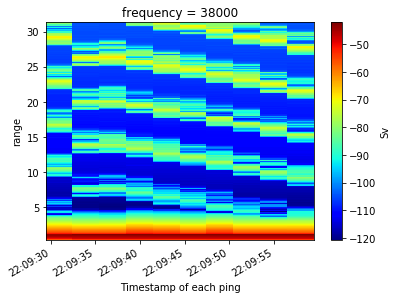

In [9]:
update_plot_Sv({'new':0})
Sv_slider.observe(update_plot_Sv, names='index')
display(Sv_slider)
plt.show()

### Processing multiple files

In [10]:
from bs4 import BeautifulSoup
import os

In [11]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
raw_files = [link.get('href') for link in soup.pre.find_all('a') if '.01A' in link.get('href')]
url_list = [url + file for file in raw_files]

**Downloading the files**

In [12]:
for i, url in enumerate(url_list):
    r = requests.get(url)
    open(path + raw_files[i], 'wb').write(r.content)

**Converting from raw to a standardized netCDF format**

In [13]:
for file in raw_files[1:]:
    data_tmp = ConvertAZFP(os.path.join(path + file), os.path.join(path + xml_filename))
    data_tmp.raw2nc()

File: 17082117.01A - Loading Profile #1 29-Mar-2017 23:05:00 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0

File: 17082117.01A - Loading Profile #5 30-Mar-2017 00:04:59 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0

File: 17082117.01A - Loading Profile #9 30-Mar-2017 01:04:59 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0

File: 17082117.01A - Loading Profile #13 30-Mar-2017 02:04:59 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0

File: 17082117.01A - Loading Profile #17 30-Mar-2017 03:04:59 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0

File: 17082117.01A - Loading Profile #21 30-Mar-2017 04:04:59 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0

File: 17082117.01A - Loading Profile #25 30-Mar-2017 05:04:59 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0

File: 17082117.01A - Loading Profile #29 30-

**Calibrate**

In [14]:
nc_files = [filename[:-4] + '.nc' for filename in raw_files]

for file in nc_files:
    data = EchoDataAZFP(path + file)
    data.calibrate()
    os.remove(path + file)

23:15:07 saving calibrated Sv to azfp_data\17032922_Sv.nc
23:15:07 saving calibrated Sv to azfp_data\17032923_Sv.nc
23:15:08 saving calibrated Sv to azfp_data\17033000_Sv.nc
23:15:08 saving calibrated Sv to azfp_data\17033001_Sv.nc
23:15:08 saving calibrated Sv to azfp_data\17033002_Sv.nc
23:15:09 saving calibrated Sv to azfp_data\17033003_Sv.nc
23:15:09 saving calibrated Sv to azfp_data\17033004_Sv.nc
23:15:09 saving calibrated Sv to azfp_data\17033005_Sv.nc
23:15:10 saving calibrated Sv to azfp_data\17033006_Sv.nc
23:15:10 saving calibrated Sv to azfp_data\17033007_Sv.nc
23:15:10 saving calibrated Sv to azfp_data\17033008_Sv.nc
23:15:10 saving calibrated Sv to azfp_data\17033009_Sv.nc
23:15:11 saving calibrated Sv to azfp_data\17033010_Sv.nc
23:15:11 saving calibrated Sv to azfp_data\17033011_Sv.nc
23:15:12 saving calibrated Sv to azfp_data\17033012_Sv.nc
23:15:13 saving calibrated Sv to azfp_data\17033013_Sv.nc
23:15:13 saving calibrated Sv to azfp_data\17033014_Sv.nc
23:15:13 savin

In [15]:
import dask
import matplotlib.pyplot as plt

In [16]:
res = xr.open_mfdataset(path + '*Sv.nc')

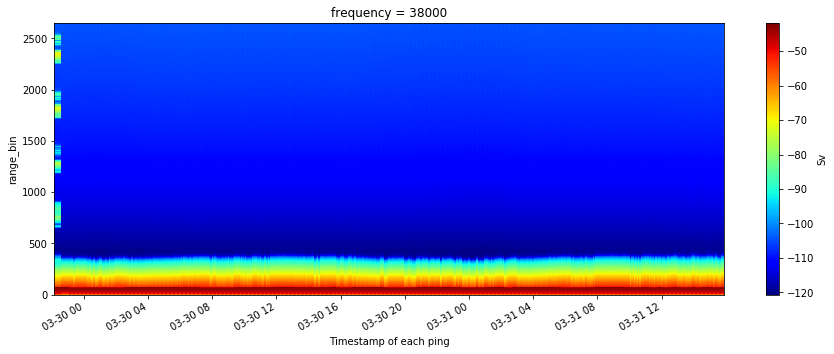

In [17]:
plt.figure(figsize = (15,5))
res.Sv.isel(frequency=0).plot(x='ping_time',cmap = 'jet')